In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

**Part1 - Reading Dataset**

In [4]:
data = pd.read_csv("Dataset.csv") # Reading and converting the data into a pandas dataframe
data.shape # Calculating the dimensions of the dataset

(299, 13)

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Part2 - Data Inspecting and Cleaning**

In [7]:
# Checking for null values in the dataset
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# Checking for duplicated values
data.duplicated().sum()

0

**Part3 - Exploratory Data Analysis**

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

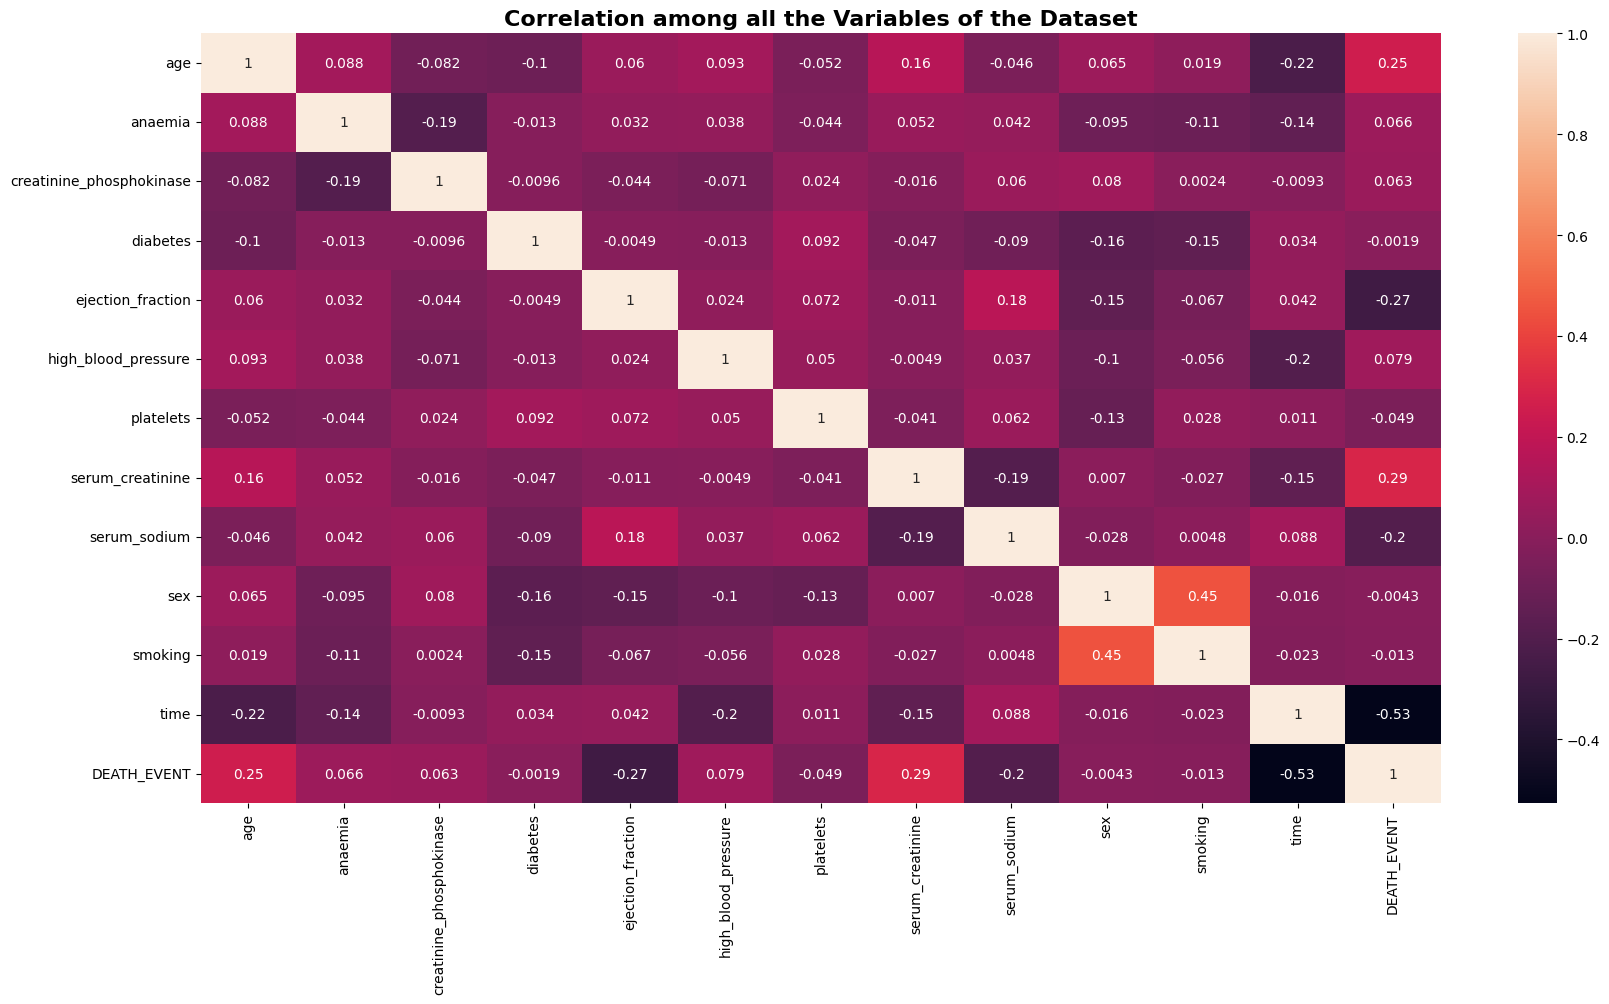

In [10]:
# Visualizing the distribution of the target variable
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=16, fontweight='bold')

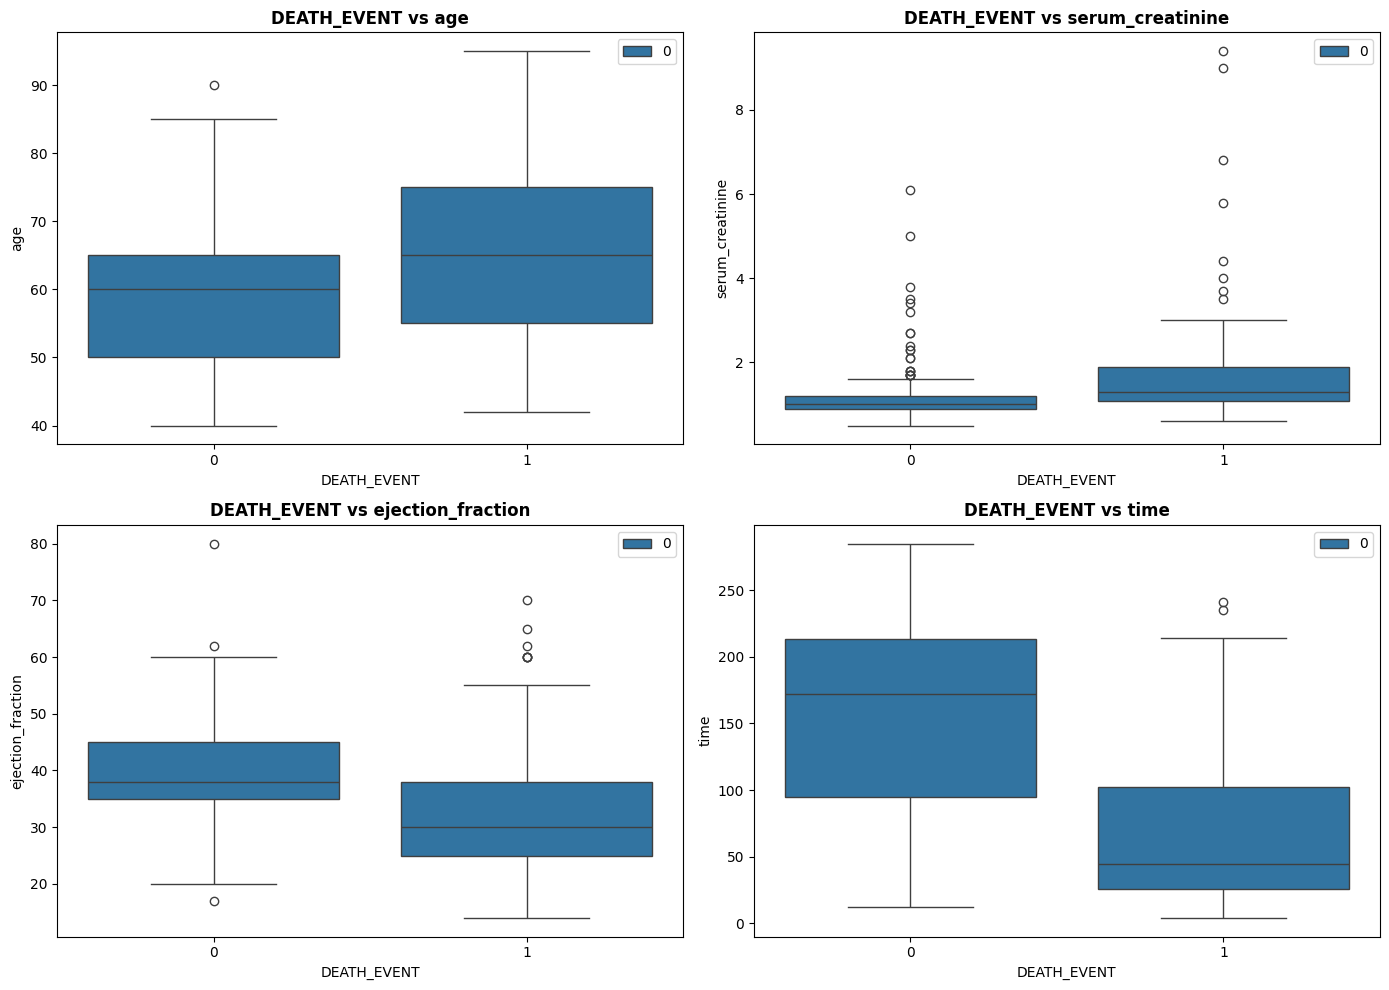

In [11]:
# Selecting key features for analysis
key_features = ["age", "serum_creatinine", "ejection_fraction", "time"]

# Displaying boxplots for key features against DEATH_EVENT
plt.figure(figsize=(14, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x="DEATH_EVENT", y=feature, hue=0)
    plt.title(f"DEATH_EVENT vs {feature}", weight='bold')
plt.tight_layout()
plt.show()

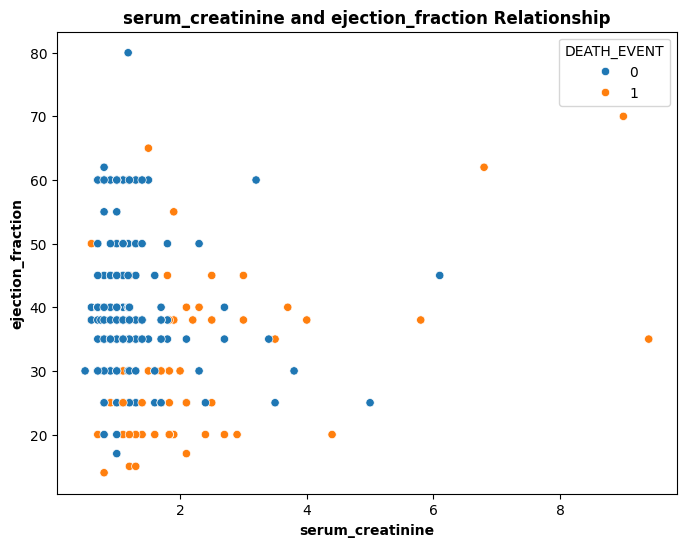

In [12]:
# Visualizing the relationship between serum_creatinine and ejection_fraction
plt.figure(figsize=(8, 6))
sns.scatterplot(x='serum_creatinine', y='ejection_fraction', hue='DEATH_EVENT', data=data)
plt.title('serum_creatinine and ejection_fraction Relationship', weight='bold')
plt.xlabel('serum_creatinine', weight='bold')
plt.ylabel('ejection_fraction', weight='bold')
plt.legend(title="DEATH_EVENT")
plt.show()

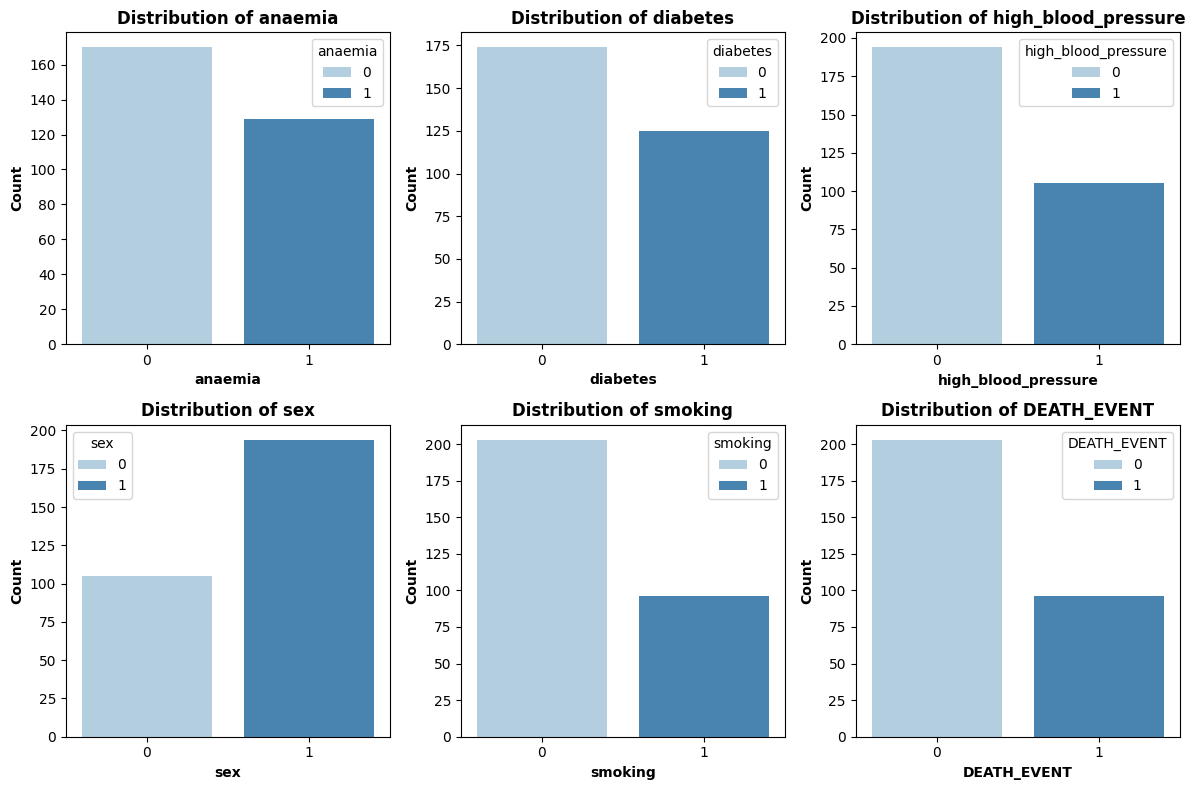

In [13]:
# The counts of the binary features were plotted on a histogram to see if the data were evenly distributed
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()    # Flatten the axes array for easy iteration

# Iterating through each binary column to create count plots
for i, column in enumerate(binary_columns):
    sns.countplot(data=data, x=column, hue=column, ax=axes[i], palette='Blues', legend=True)
    axes[i].set_title(f'Distribution of {column}', weight='bold') # Setting the title for each subplot
    axes[i].set_xlabel(column, weight='bold')
    axes[i].set_ylabel('Count', weight='bold')

plt.tight_layout()
plt.show()    # Plotting the distribution of binary features

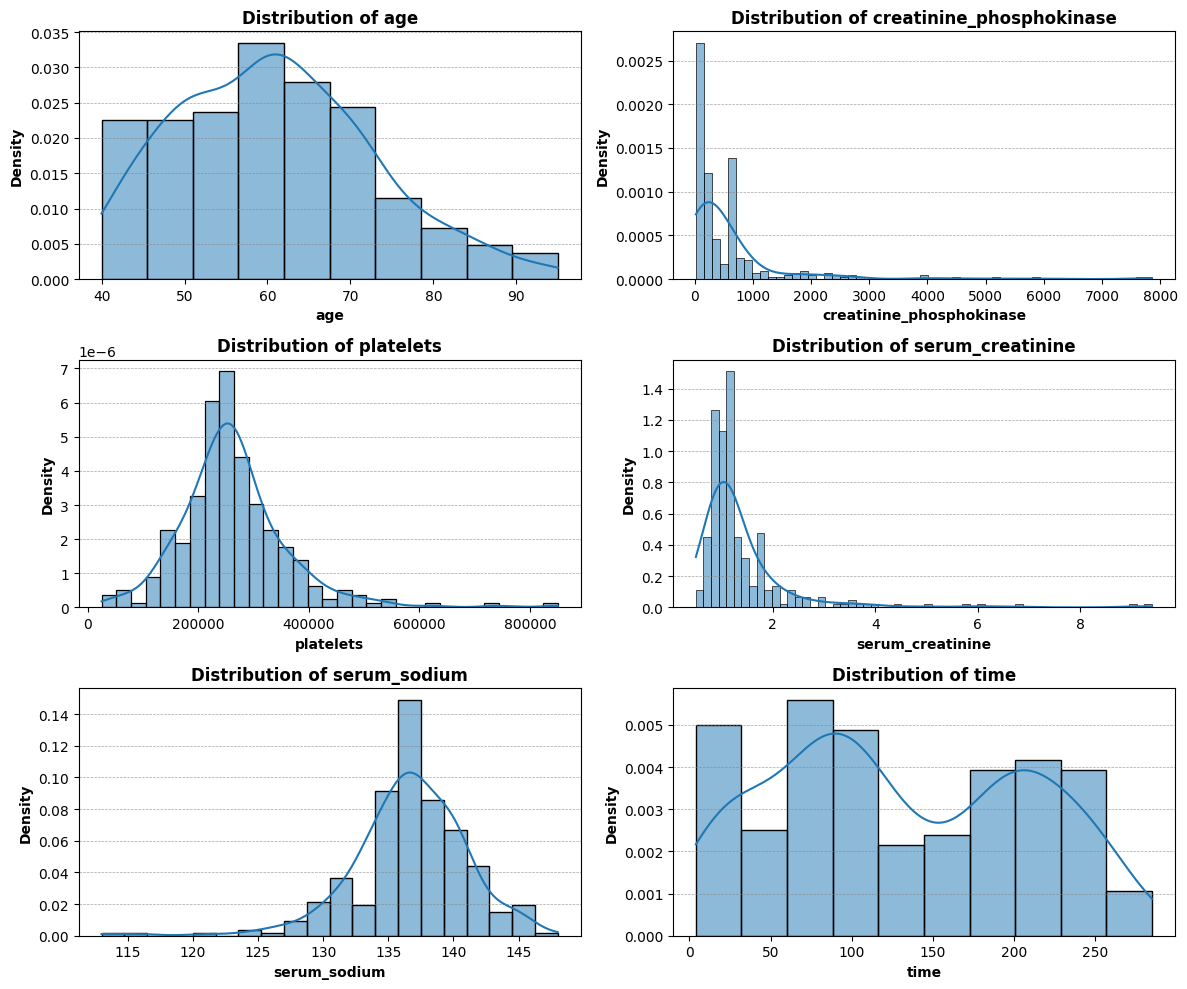

In [14]:
# The counts of the binary features were plotted on a histogram to see if the data were evenly distributed
columns_to_plot = ['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()    # Flatten the axes array for easy iteration

# Iterate through each column and plot its distribution
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], kde=True, stat="density", ax=axes[i])    # Plot histogram with density curve
    axes[i].set_title(f'Distribution of {column}', weight='bold')       # Set title for each subplot
    axes[i].set_xlabel(column, weight='bold')
    axes[i].set_ylabel('Density', weight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5, color='gray')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()    # Display the plots

***NOTICE:*** *For the 6 graphs above, we can see the `high_blood_pressure`, `sex`, `smoking`, `creatinine_phosphokinase`, `serum_creatinine`, `time`, `DEATH_EVENT` are imbalanced. So we should do some measures.*

**For Purpose Object `DEATH_EVENT`** use ***SMOTE OverSampling***

In [15]:
y = data['DEATH_EVENT']
pd.Series(y).value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [16]:
y = data['DEATH_EVENT']  # Assuming 'DEATH_EVENT' is the target variable
X = data.drop(['DEATH_EVENT'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=9)

In [17]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(train_x, train_y)

In [18]:
# Displaying the counts of the resampled target variable
pd.Series(y_train_resampled).value_counts()

DEATH_EVENT
1    158
0    158
Name: count, dtype: int64

**Part4 - Modeling**

**Model 1: Random Forest**

In [ ]:
# Training a Random Forest Classifier with balanced class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(train_x, train_y)

In [24]:
M1 = 'Random Forest Classfier'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_predicted = rf_model.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix: \n", rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest Classification: {0:0.4f}".format(rf_acc_score))
print("\n")
print(classification_report(test_y, rf_predicted))
print("ROC AUC Score: ", roc_auc_score(test_y, rf_model.predict_proba(test_x)[:, 1]))

confussion matrix: 
 [[40  5]
 [ 1 14]]


Accuracy of Random Forest Classification: 0.9000


              precision    recall  f1-score   support

           0       0.98      0.89      0.93        45
           1       0.74      0.93      0.82        15

    accuracy                           0.90        60
   macro avg       0.86      0.91      0.88        60
weighted avg       0.92      0.90      0.90        60

ROC AUC Score:  0.9400000000000001


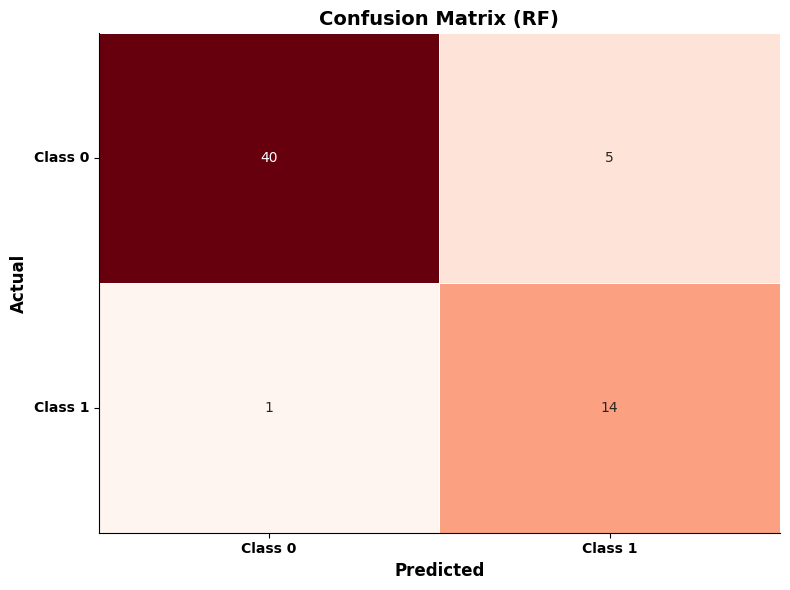

In [ ]:
# Plotting the confusion matrix for the RF model
plt.figure(figsize=(8, 6))
sns.heatmap(
    rf_conf_matrix,
    annot=True, 
    fmt='d', 
    cmap='Reds', 
    xticklabels=['Class 0', 'Class 1'], 
    yticklabels=['Class 0', 'Class 1'],
    cbar=False,
    linewidths=0.5,
    linecolor='white'
)
plt.title('Confusion Matrix (RF)', fontsize=14, weight='bold')
plt.xlabel('Predicted', fontsize=12, weight='bold')
plt.ylabel('Actual', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold', rotation=0)
sns.despine()
plt.tight_layout()
plt.show()

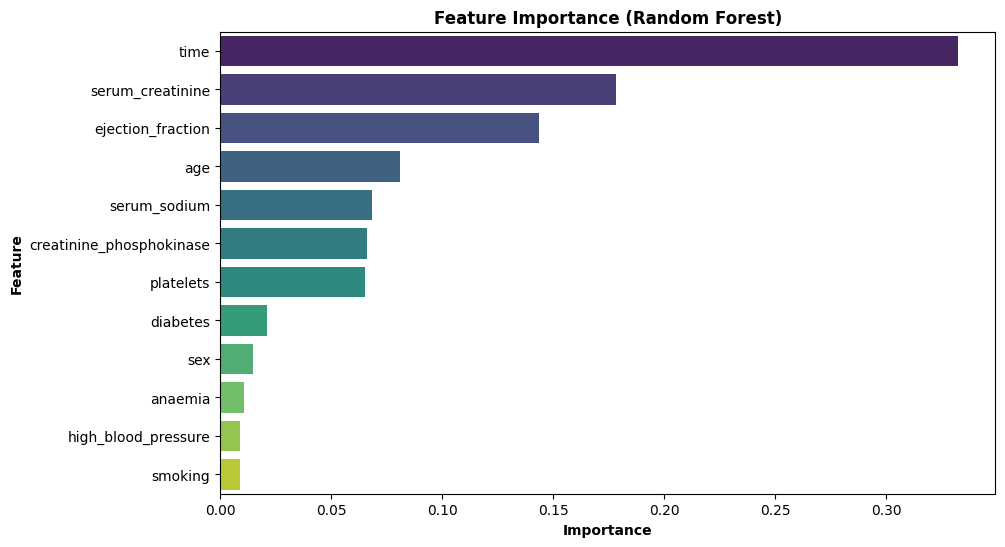

In [ ]:
# Calculate and visualize feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualization Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature')
plt.xlabel('Importance', weight='bold')
plt.ylabel('Feature', weight='bold')
plt.title("Feature Importance (Random Forest)", weight='bold')
plt.show()

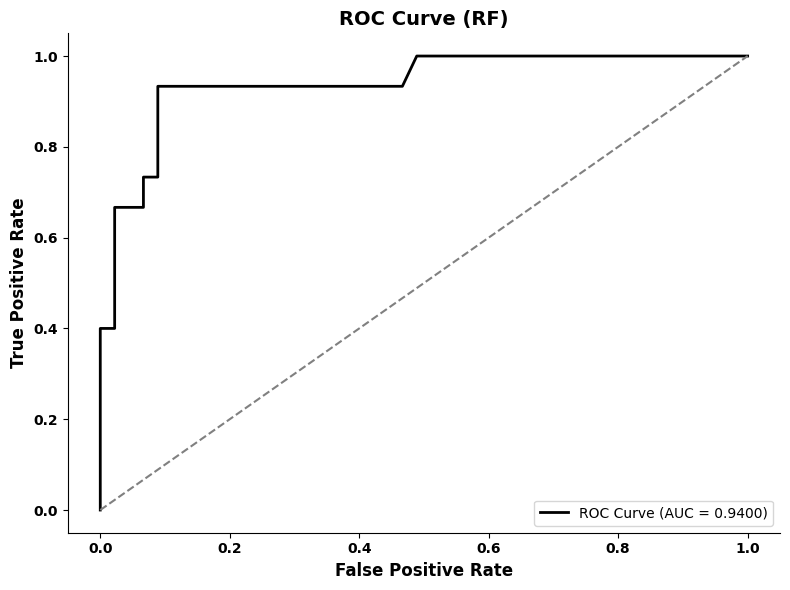

In [23]:
# Plotting the ROC curve for the RF model
y_proba = rf_model.predict_proba(test_x)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1.5)
plt.title('ROC Curve (RF)', fontsize=14, weight='bold')
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()